<a href="https://colab.research.google.com/github/rahulkhankar/SelfProject/blob/master/Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
file = r'/gdrive/My Drive/Colab Notebooks/Dataset/Next text/chamber_of_secrets.txt'

### Tokenize and Clean Text

In [3]:
import spacy
nlp = spacy.load('en')

In [4]:
stopword=['a','an','the','.']

In [5]:
def separate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n"-#$%&()--*+,-/:;<=>?@[\\]^_`{|}~\t\n ' if token.text not in stopword]

In [6]:
x = open(r'/gdrive/My Drive/Colab Notebooks/Dataset/Next text/chamber_of_secrets.txt',encoding='utf-8')
d=x.read()
tokens = separate_punc(d)

In [7]:
tokens

['not',
 'for',
 'first',
 'time',
 'argument',
 'had',
 'broken',
 'out',
 'over',
 'breakfast',
 'at',
 'number',
 'four',
 'privet',
 'drive',
 'mr.',
 'vernon',
 'dursley',
 'had',
 'been',
 'woken',
 'in',
 'early',
 'hours',
 'of',
 'morning',
 'by',
 'loud',
 'hooting',
 'noise',
 'from',
 'his',
 'nephew',
 'harry',
 '’s',
 'room',
 '“',
 'third',
 'time',
 'this',
 'week',
 '!',
 '”',
 'he',
 'roared',
 'across',
 'table',
 '“',
 'if',
 'you',
 'can',
 'not',
 'control',
 'that',
 'owl',
 'it',
 'will',
 'have',
 'to',
 'go',
 '!',
 '”',
 'harry',
 'tried',
 'yet',
 'again',
 'to',
 'explain',
 '“',
 'she',
 'is',
 'bored',
 '”',
 'he',
 'said',
 '“',
 'she',
 'is',
 'used',
 'to',
 'flying',
 'around',
 'outside',
 'if',
 'i',
 'could',
 'just',
 'let',
 'her',
 'out',
 'at',
 'night',
 '”',
 '“',
 'do',
 'i',
 'look',
 'stupid',
 '”',
 'snarled',
 'uncle',
 'vernon',
 'bit',
 'of',
 'fried',
 'egg',
 'dangling',
 'from',
 'his',
 'bushy',
 'mustache',
 '“',
 'i',
 'know',
 '

In [8]:
from collections import Counter

In [9]:
counts = Counter(tokens)
#counts.most_common()

In [10]:
len(tokens)

85739

In [11]:
len(tokens)/30

2857.9666666666667

## Create Sequences of Tokens

In [12]:
# organize into sequences of tokens
train_len = 30+1 # 30 training words , then one target word

# Empty list of sequences
text_sequences = []

for i in range(train_len, len(tokens)):
    
    # Grab train_len# amount of characters
    seq = tokens[i-train_len:i]
    
    # Add to list of sequences
    text_sequences.append(seq)

In [13]:
' '.join(text_sequences[0])

'not for first time argument had broken out over breakfast at number four privet drive mr. vernon dursley had been woken in early hours of morning by loud hooting noise from'

In [14]:
len(text_sequences)

85708

# Keras

### Keras Tokenization

In [15]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [16]:
# integer encode sequences of words
tokenizer = Tokenizer()


In [17]:
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

In [18]:
#sequences[0]

In [19]:
#tokenizer.index_word

In [20]:
for i in sequences[0]:
    print(f'{i} : {tokenizer.index_word[i]}')


31 : not
30 : for
177 : first
89 : time
3839 : argument
16 : had
818 : broken
32 : out
63 : over
708 : breakfast
20 : at
1584 : number
399 : four
1383 : privet
1382 : drive
113 : mr.
284 : vernon
2203 : dursley
16 : had
49 : been
1853 : woken
14 : in
1220 : early
755 : hours
5 : of
528 : morning
70 : by
332 : loud
6781 : hooting
527 : noise
42 : from


In [21]:
vocabulary_size = len(tokenizer.word_counts)
vocabulary_size

6781

### Convert to Numpy Matrix

In [22]:
import numpy as np

In [23]:
sequences = np.array(sequences)

In [24]:
sequences

array([[  31,   30,  177, ..., 6781,  527,   42],
       [  30,  177,   89, ...,  527,   42,   11],
       [ 177,   89, 3839, ...,   42,   11, 2776],
       ...,
       [1578,  105,   20, ...,    6,  757,    3],
       [ 105,   20,  130, ...,  757,    3,  674],
       [  20,  130,    6, ...,    3,  674,  104]])


# Creating an LSTM based model

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,Dropout

In [ ]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 25, input_length=seq_len))
    model.add(LSTM(150, return_sequences=False))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(vocabulary_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

### Train / Test Split

In [26]:
from keras.utils import to_categorical

In [27]:
sequences

array([[  31,   30,  177, ..., 6781,  527,   42],
       [  30,  177,   89, ...,  527,   42,   11],
       [ 177,   89, 3839, ...,   42,   11, 2776],
       ...,
       [1578,  105,   20, ...,    6,  757,    3],
       [ 105,   20,  130, ...,  757,    3,  674],
       [  20,  130,    6, ...,    3,  674,  104]])

In [28]:
# First 49 words
sequences[:,:-1]

array([[  31,   30,  177, ...,  332, 6781,  527],
       [  30,  177,   89, ..., 6781,  527,   42],
       [ 177,   89, 3839, ...,  527,   42,   11],
       ...,
       [1578,  105,   20, ...,  308,    6,  757],
       [ 105,   20,  130, ...,    6,  757,    3],
       [  20,  130,    6, ...,  757,    3,  674]])

In [29]:
# last Word
sequences[:,-1]

array([  42,   11, 2776, ...,    3,  674,  104])

In [30]:
X = sequences[:,:-1]

In [31]:
y = sequences[:,-1]

In [32]:
y = to_categorical(y, num_classes=vocabulary_size+1 , dtype='uint8')

In [33]:
seq_len = X.shape[1]

In [34]:
seq_len

30

In [35]:
sequences[:,-1]

array([  42,   11, 2776, ...,    3,  674,  104])

In [36]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Training the Model

In [ ]:
# define model
model = create_model(vocabulary_size+1, seq_len)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 25)            169550    
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               105600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 6782)              1024082   
Total params: 1,344,532
Trainable params: 1,344,532
Non-trainable params: 0
____________________________________________

# Train Again

In [ ]:
# fit model
train_acc=list()
train_loss=list()
val_acc = list()
val_loss=list()
history = model.fit(X_train, y_train, batch_size=128 ,validation_data=(X_test, y_test), epochs = 400, verbose=1)

train_acc = history.history['accuracy']
train_loss= history.history['loss']
val_acc   = history.history['val_accuracy']
val_loss  = history.history['val_loss']

with open("/gdrive/My Drive/Colab Notebooks/Dataset/Next text/val_loss.txt", "w") as file:
    file.write(str(val_loss))
with open("/gdrive/My Drive/Colab Notebooks/Dataset/Next text/val_accuracy.txt", "w") as file:
    file.write(str(val_acc))
with open("/gdrive/My Drive/Colab Notebooks/Dataset/Next text/accuracy.txt", "w") as file:
    file.write(str(train_acc))
with open("/gdrive/My Drive/Colab Notebooks/Dataset/Next text/loss.txt", "w") as file:
    file.write(str(train_loss))    

model.save('/gdrive/My Drive/Colab Notebooks/Dataset/Next text/text_generation.h5') 
import pickle
with open('/gdrive/My Drive/Colab Notebooks/Dataset/Next text/300620.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 57424 samples, validate on 28284 samples
Epoch 1/400
57424/57424 [==============================] - 32s 563us/step - loss: 6.7640 - accuracy: 0.0318 - val_loss: 6.7068 - val_accuracy: 0.0330
Epoch 2/400
57424/57424 [==============================] - 29s 505us/step - loss: 6.4626 - accuracy: 0.0339 - val_loss: 6.6055 - val_accuracy: 0.0359
Epoch 3/400
57424/57424 [==============================] - 29s 507us/step - loss: 6.3550 - accuracy: 0.0401 - val_loss: 6.5016 - val_accuracy: 0.0460
Epoch 4/400
57424/57424 [==============================] - 31s 546us/step - loss: 6.2028 - accuracy: 0.0513 - val_loss: 6.4189 - val_accuracy: 0.0588
Epoch 5/400
57424/57424 [==============================] - 29s 512us/step - loss: 6.0317 - accuracy: 0.0676 - val_loss: 6.2814 - val_accuracy: 0.0820
Epoch 6/400
57424/57424 [==============================] - 30s 518us/step - loss: 5.8410 - accuracy: 0.0896 - val_loss: 6.2097 - val_accuracy: 0.0951
Epoch 7/400
57424/57424 [=========================

# Load Files

In [ ]:
with open("/gdrive/My Drive/Colab Notebooks/Dataset/Next text/accuracy.txt", "w") as file:
    file.write(str(train_acc))

In [ ]:
with open("/gdrive/My Drive/Colab Notebooks/Dataset/Next text/loss.txt", "w") as file:
    file.write(str(train_loss))

In [ ]:
with open("/gdrive/My Drive/Colab Notebooks/Dataset/Next text/val_accuracy.txt", "w") as file:
    file.write(str(val_acc))

In [ ]:
with open("/gdrive/My Drive/Colab Notebooks/Dataset/Next text/val_loss.txt", "w") as file:
    file.write(str(val_loss))

# Plot loss and accuracy

In [ ]:
import matplotlib.pyplot as plt

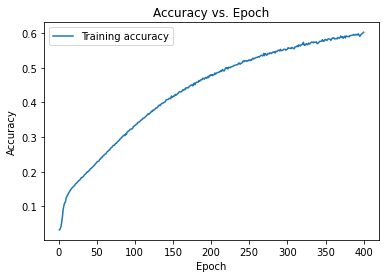

In [ ]:
def plot_accuracy(data2):
    x = list(range(1, len(data2) + 1))
    plt.plot(x, data2, label = 'Training accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    
plot_accuracy(train_acc)

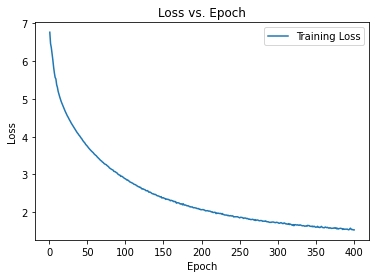

In [ ]:
def plot_loss(data1):
    x = list(range(1, len(data1) + 1))
    plt.plot(x, data1, label = 'Training Loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')  
    
plot_loss(train_loss)

# Generating New Text

In [37]:
from keras.models import load_model

In [38]:
model=load_model('/gdrive/My Drive/Colab Notebooks/Dataset/Next text/text_generation.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [39]:
import pickle
with open('/gdrive/My Drive/Colab Notebooks/Dataset/Next text/300620.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [40]:

#from pickle import load
#from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [41]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    
    #INPUTS:
    #model : model that was trained on text data
    #tokenizer : tokenizer that was fit on text data
    #seq_len : length of training sequence
    #seed_text : raw string text to serve as the seed
    #num_gen_words : number of words to be generated by model
    
    
    # Final Output
    output_text = []
    
    # Intial Seed Sequence
    input_text = seed_text
    
    # Create num_gen_words
    for i in range(num_gen_words):
        
        # Take the input text string and encode it to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        
        # Pad sequences to our trained rate (30 words in the video)
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        
        # Predict Class Probabilities for each word
        pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0]
        
        # Grab word
        pred_word = tokenizer.index_word[pred_word_ind] 
        
        # Update the sequence of input text (shifting one over with the new word)
        input_text += ' ' + pred_word
        
        output_text.append(pred_word)
        
    # Make it look like a sentence.
    return ' '.join(output_text)

### Predict next sequence

In [73]:
x= ' '.join(text_sequences[1000])
x

'hadnot even remembered that today happened to be harry ’s twelfth birthday of course his hopes hadnot been high they had never given him real present let alone cake — but'

In [74]:
random_seed_text = x

In [75]:
random_seed_text

'hadnot even remembered that today happened to be harry ’s twelfth birthday of course his hopes hadnot been high they had never given him real present let alone cake — but'

In [76]:
seed_text = ' '.join(random_seed_text)

In [77]:
print(seed_text)

h a d n o t   e v e n   r e m e m b e r e d   t h a t   t o d a y   h a p p e n e d   t o   b e   h a r r y   ’ s   t w e l f t h   b i r t h d a y   o f   c o u r s e   h i s   h o p e s   h a d n o t   b e e n   h i g h   t h e y   h a d   n e v e r   g i v e n   h i m   r e a l   p r e s e n t   l e t   a l o n e   c a k e   —   b u t


In [79]:
print(generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=24))

who was having “ what wouldnot have worry ” ron shouted “ lie to my wand ” said riddle drawing sun her hand impatiently
